#  <center>MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with R-project</center>
<center>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | August 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]</center>
<hr>

## I Introduction

This project presents an application of several supervised learning algorithms to the classification problem, evaluating and selecting the best of them according to a precision measurement (accuracy_score) and the caret R-project library.

The famous iris flowers dataset is used as a data support. The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. These columns are the variables (features): SepalLength; SepalWidth; PetalLength; PetalWidth.

The fifth column is the species of the flower observed. All observed flowers belong to one of three species: Iris-setosa; Iris-versicolor; Iris-virginica.

You can learn more about this dataset on [  Wikipedia ](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The dataset can be gotten from [  UCI Machine Learning Repository ](https://archive.ics.uci.edu/ml/datasets/Iris), but in this project I will use a copy of this dataset which I am going to download from [  here ](https://en.wikipedia.org/wiki/Iris_flower_data_set) [ http://www.arqmain.net/MLearning/Datasets/iris.csv].

By the end of this project we will have covered the following topics, in a very specific way (of course):

* A way to import a dataset from a website to R. 
* A way to use R library to analyze the dataset. 
* A way to use some R libraries to quickly plot charts that could help us to understand the problem. 
* A way to use Machine Learning (ML) using caret package to perform predictive analysis. 
* A way to compare different ML models, select one from them and present predictions for a new set of data. 
* A way to use analytical as well as technical skills to create an end-to-end project.


## II Import R libraries

Let’s import all of the modules, functions and objects we are going to use.


In [1]:
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("dplyr", "tidyr", "psych", "reshape2", "GGally", "ggplot2", "Amelia", "pastecs", "caret")
ipak(packages)
 

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: psych
Loading required package: reshape2

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: GGally

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: Amelia
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Loading required package:

dplyr    tidyr    psych reshape2   GGally  ggplot2   Amelia  pastecs 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
   caret 
    TRUE

## III Loading and checking the data

The dataset can be gotten from [  UCI Machine Learning Repository ](https://archive.ics.uci.edu/ml/datasets/Iris), but in this project I will use a copy of this dataset which I am going to download from [  here ](https://en.wikipedia.org/wiki/Iris_flower_data_set) [ http://www.arqmain.net/MLearning/Datasets/iris.csv].


In [2]:
# read and attach the dataset
filename <- "http://www.arqmain.net/MLearning/Datasets/iris.csv"

# load the CSV file from the local directory
df <- read.csv(filename, header=TRUE)
attach(df)
 

## IV Checking the data

Even curated data sets from the government can have errors in them, and it’s vital that we spot these errors before investing too much time in our analysis. So, we will have a look at the dataset to answer the following questions:

* Is there anything wrong with the data? 
* Is there any particularity with the data? 
* Do I need to fix or remove any of the data?


In [3]:
# print head and tail rows from dataset df
as.data.frame(head(df,5))
 

SepalLength,SepalWidth,PetalLength,PetalWidth,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
as.data.frame(tail(df,5))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents.

Each row following the first one represents an entry for a flower: four measurements and one class, which tells us the species of the flower.


In [5]:
# dimensions (or shape) of dataset
dim(df)
 

[1] 150   5

This is exactly the result we are looking for. We should see 150 instances (rows) and 5 attributes (columns) as an answer.
### <i>How about missing values?</i>

Missing data in R appears as NA. NA is not a string or a numeric value, but an indicator of missingness.

We have to note that NA means Missing value. But, “NA” means the character string NA, not missing value.

We do not need to tell R that NA means missing value. R already know that.

If there are multiple types of missing values in your dataset, you can extend what R considers a missing value when it reads the file in using “na.strings” argument.  For instance, if you wanted to read in a .CSV file named data_example.csv that had missing values represented as an empty cell, a single blank space, and the value -999, you may use:


> <font color="brown">temp_df <- read.csv(file = “data_example.csv”, na.strings = c("NA", " ", "-999"))</font>


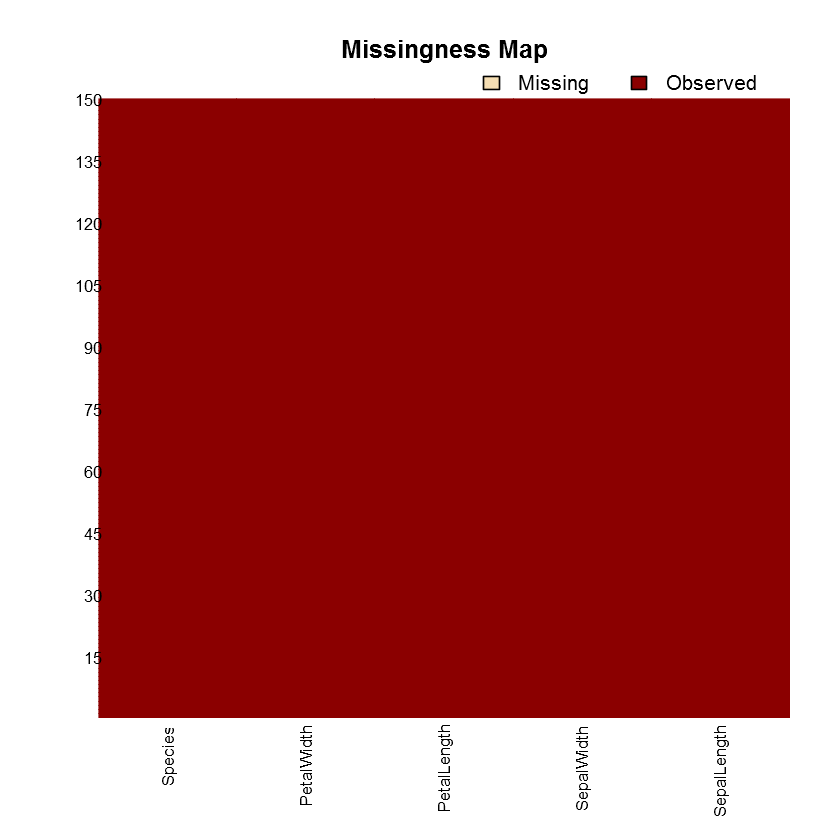

In [6]:
# This is a map for visualizing the missing rows (Package Amelia).
missmap(df)
 

In [7]:
#  A way to find all the rows in a data frame with at least one NA.
(row.has.na <- apply(df, 1, function(x){any(is.na(x))}))
 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

In [8]:
#  tell R to find all rows with missing values and list them fully.
df[ !complete.cases(df) , ]
 

SepalLength,SepalWidth,PetalLength,PetalWidth,Species


In [9]:
# get some information about the dataset
str(df)
 

'data.frame':	150 obs. of  5 variables:
 $ SepalLength: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidth : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLength: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidth : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species    : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
# list the levels for the Species class
levels(df$Species)
 

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [11]:
# count the number of non-NA values by variables in the dataset
df %>% 
  gather(var, value) %>% 
  count(var)
 

Warning message:
"attributes are not identical across measure variables; they will be dropped"

var,n
PetalLength,150
PetalWidth,150
SepalLength,150
SepalWidth,150
Species,150


In [12]:
df %>% 
gather(var, value) %>% 
count(var)

Warning message:
"attributes are not identical across measure variables; they will be dropped"

var,n
PetalLength,150
PetalWidth,150
SepalLength,150
SepalWidth,150
Species,150


In [13]:
# summarize the class distribution
 df %>%
  group_by(Species) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(Species,total,percentage)

Species,total,percentage
Iris-setosa,50,33.3
Iris-versicolor,50,33.3
Iris-virginica,50,33.3


## V Summarize the dataset

Let’s get into some statistical analysis with the dataset. This initial process will aid us to get some basic understanding of the dataset.


In [13]:
# get the summary statistics of the dataset
summary(df)

  SepalLength      SepalWidth     PetalLength      PetalWidth   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

In [14]:
# five number rule using vapply function
(vapply(df[,1:4], fivenum, c(Min.=0, "1st Qu."=0, Median=0, "3rd Qu."=0, Max.=0)))
 

,SepalLength,SepalWidth,PetalLength,PetalWidth
Min.,4.3,2.0,1.00,0.1
1st Qu.,5.1,2.8,1.60,0.3
Median,5.8,3.0,4.35,1.3
3rd Qu.,6.4,3.3,5.10,1.8
Max.,7.9,4.4,6.90,2.5


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

Anyway, tables like this are rarely useful unless we know that our data should fall in a particular range. It’s usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.


## VI Data Visualization

### 6.1 Univariate plots to better understand each attribute.


In [15]:
# box and whisker plots of each variable
par(mfrow=c(1,1))
long <- melt(df[,-5])

No id variables; using all as measure variables


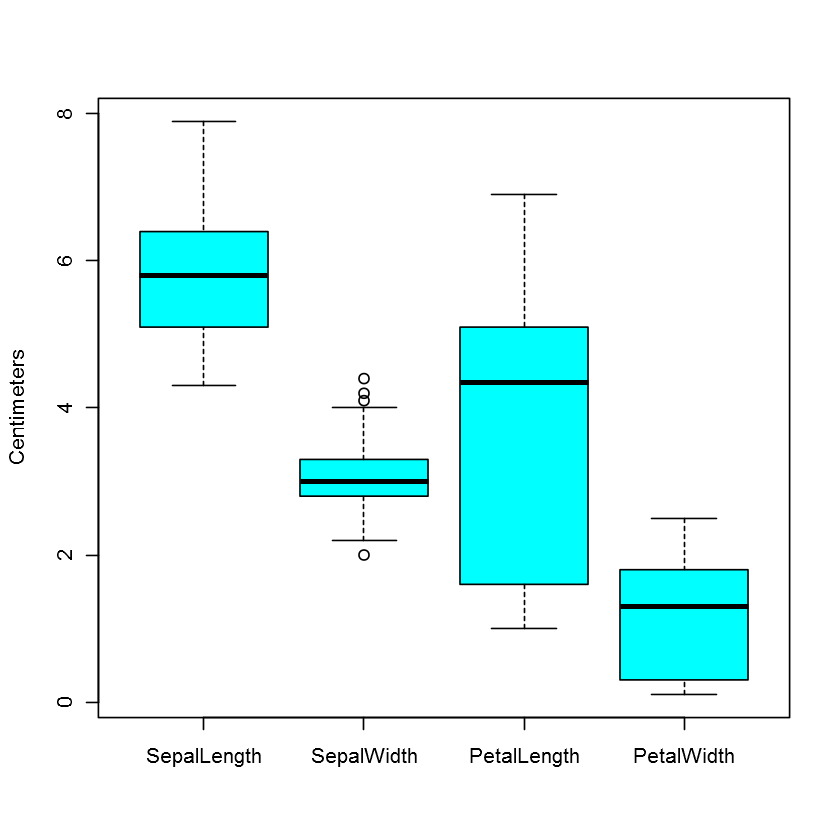

In [16]:
plot(value ~ variable, col="cyan", ylab="Centimeters", xlab="", data=long)


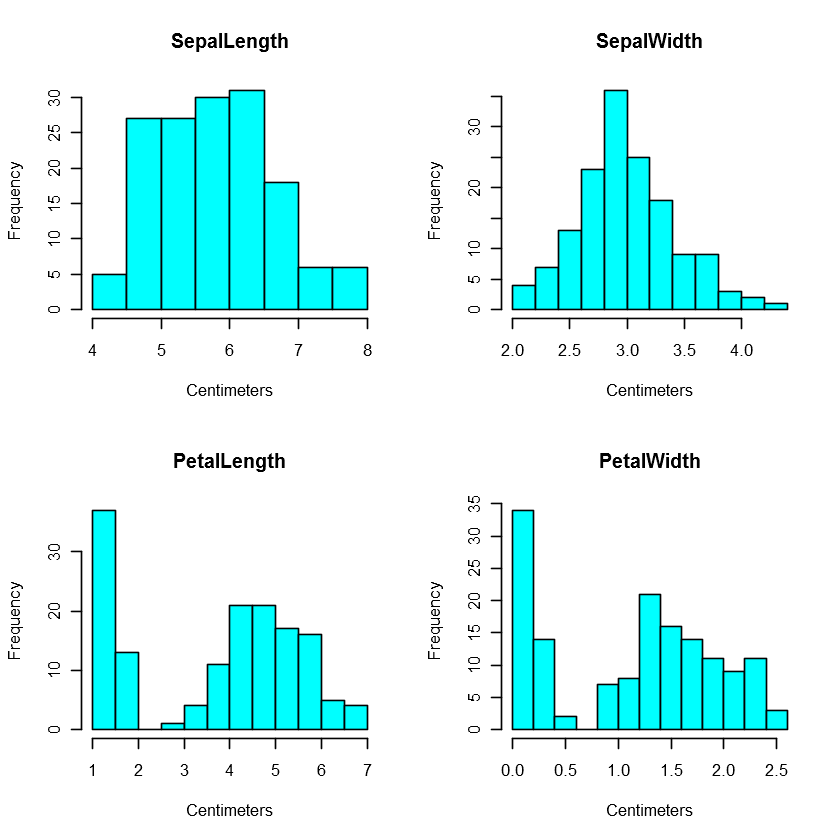

In [17]:
# histograms
par(mfrow=c(2,2))
for(i in 1:4) {
    hist(df[,i], main=names(df)[i], col="cyan", xlab="Centimeters", ylab="Frequency")
}
 


Even though two of the input variables are clearly asymmetric, it looks like perhaps the other two have a Gaussian distribution. This may be useful to note if we are planning to use algorithms that require this assumption.

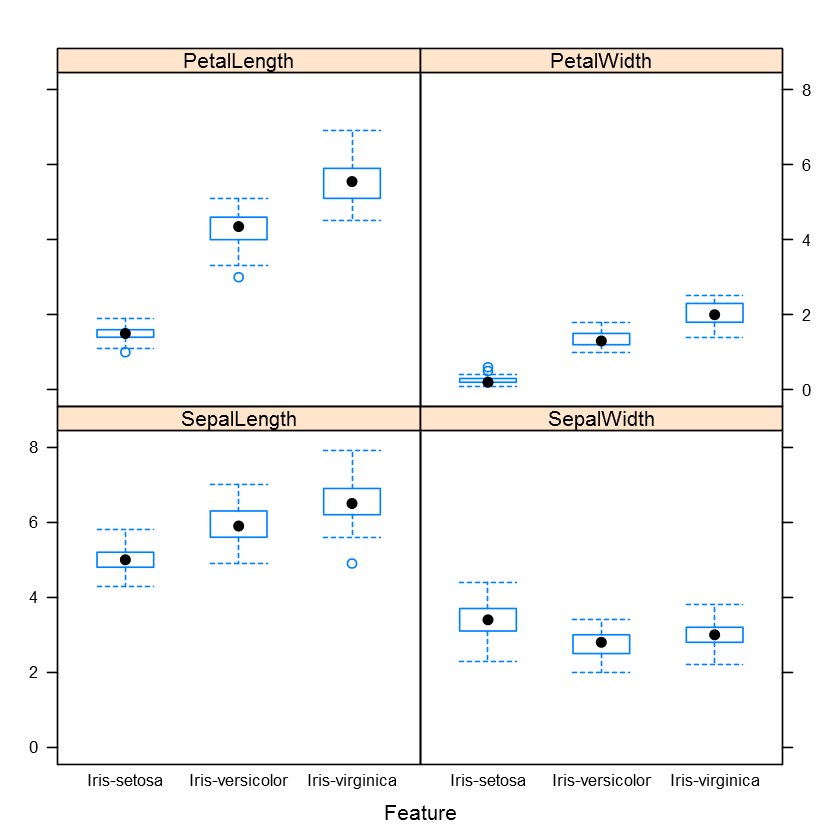

In [18]:
# box and whisker plots of each variable by species
featurePlot(x=df[,1:4], y=df[,5], plot="box")
 

### 6.2 Multivariate plots to better understand the relationships between attributes.

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.
  


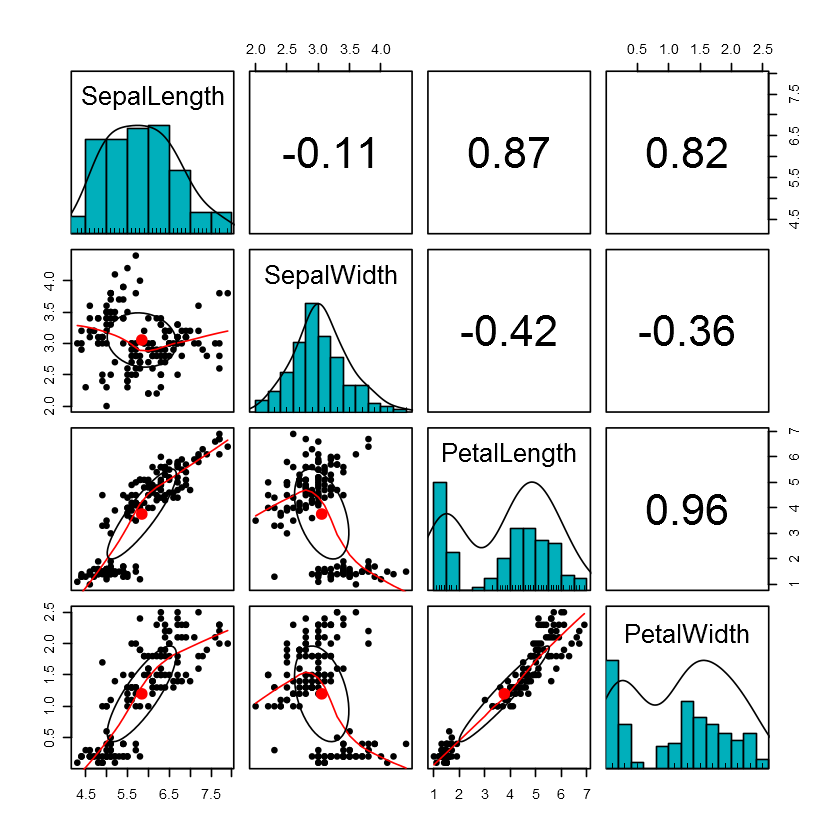

In [19]:
# scatter plot matrix
pairs.panels(df[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )
 

We can note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

At the same time, there’s something strange going with the petal measurements. Maybe it’s something to do with the different Iris types.


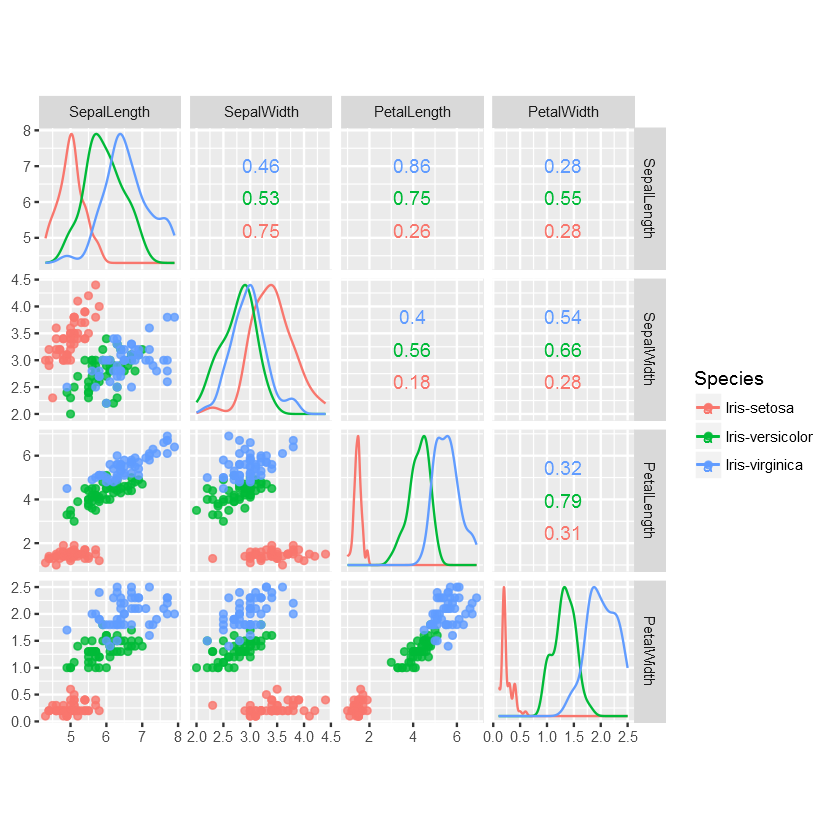

In [20]:
# scatter plot matrix by species
ggscatmat(df, columns = 1:4, color="Species", alpha=0.8)
 

From the above scatterplot matrix, we could see that all variables are highly correlated. So, we can’t separate those values just by drawing a straight line or fit a simple curve.

Now, adding colors to the plot let three groups of data clearly appears. Those groups correspond to the species of flower we know they are in the dataset.

By the way, the strange distribution of the petal measurements appears to be given that the different species. In fact, this is a very good situation to take place for our project. Now we can see that the petal measurements will make it easy for the classification algorithms to distinguish between and the other types.

On the other hand, distinguishing and should be more difficult becouse of their measurements overlap.

Finally, there are also correlations between petal length and petal width, as well as sepal length and sepal width. According with biology guys they assure, this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.


## VII Machine Learning Models
 
After getting enough information and visualizing the dataset, let’s make our hands dirty by constructing Machine Learning (ML) models to perform predictive analysis. In this project, we will explore different kinds of ML models that gives different accuracies on the same dataset. We will also explore how to split training and testing data from the original dataset, so that we can make the model learn from the training data and predict on the test data.

Here is what we are going to cover in this step:

* Separate out a validation dataset. 
* Set-up the test harness to use 10-fold cross validation. 
* Build 7 different models to predict species from flower measurements. 
* Select the best model.

### 7.1 Train dataset, validation dataset and test harness

We will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data (validation dataset).

We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.


In [21]:
# split training and testing dataset
percentage = 0.80
set.seed(7)
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(df$Species, p=percentage, list=FALSE)
# select 20% of the data for validation
validation <- df[-validation_index,]
# use the remaining 80% of data to training and testing the models
datatrain <- df[validation_index,]


In [22]:
# print the the shape of train arrays

# list number observations per variable
datatrain %>%
 gather(var, value) %>%
 count(var)

Warning message:
"attributes are not identical across measure variables; they will be dropped"

var,n
PetalLength,120
PetalWidth,120
SepalLength,120
SepalWidth,120
Species,120


In [23]:
# summarize the class distribution
 datatrain %>%
  group_by(Species) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(Species,total,percentage)



Species,total,percentage
Iris-setosa,40,33.3
Iris-versicolor,40,33.3
Iris-virginica,40,33.3


In [24]:
 iris %>%
 group_by(Species) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(Species,total,percentage)

Species,total,percentage
setosa,50,33.3
versicolor,50,33.3
virginica,50,33.3


In [25]:
iris %>%
  group_by(Species) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(Species,total,percentage)

Species,total,percentage
setosa,50,33.3
versicolor,50,33.3
virginica,50,33.3


In [26]:
# print the the shape of validation arrays

# list number observations per variable
validation %>% 
  gather(var, value) %>% 
  count(var)
 

Warning message:
"attributes are not identical across measure variables; they will be dropped"

var,n
PetalLength,30
PetalWidth,30
SepalLength,30
SepalWidth,30
Species,30


In [27]:
# summarize the class distribution
 validation %>%
  group_by(Species) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(Species,total,percentage)
 

Species,total,percentage
Iris-setosa,10,33.3
Iris-versicolor,10,33.3
Iris-virginica,10,33.3


We are using the metric of “accuracy” to evaluate models. We will be using the scoring variable when we run build and evaluate each model next.

### 7.2 Build models
 
So far, we don’t know which algorithms would be good on this project or what configurations to use. Anyway, we have gotten some tips from the plots that the species are partially linearly separable in some dimensions. As a result, we should expect generally good results.

* Logistic Regression (LR). 
* Linear Discriminant Analysis (LDA). 
* K-Nearest Neighbors (KNN). 
* Classification and Regression Trees (CART). 
* Random Forest Classifier (RF). 
* Gaussian Naive Bayes (NB). 
* Support Vector Machines (SVM).

All models incorporated here are presented and compared in their default version provided by the caret library.

We have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

All models incorporated here are presented and compared in their default version provided by the caret library.


In [28]:
# fit the models and evaluate it
set.seed(7)
metric <- "Accuracy"
control <- trainControl(method="cv", number=10)
 
# lDA algorithm
set.seed(7)
fit.lda <- train(Species~., data=datatrain, method="lda", metric=metric, trControl=control)
 
# CART algorithm
set.seed(7)
fit.cart <- train(Species~., data=datatrain, method="rpart", metric=metric, trControl=control)
 
# KNN algorithm
set.seed(7)
fit.knn <- train(Species~., data=datatrain, method="knn", metric=metric, trControl=control)

# SVM algorithm
set.seed(7)
fit.svm <- train(Species~., data=datatrain, method="svmRadial", metric=metric, trControl=control)
 
# RF (Random Forest) algorithm
set.seed(7)
fit.rf <- train(Species~., data=datatrain, method="rf", metric=metric, trControl=control)
 
# NB (Naive Bayes) algorithm
set.seed(7)
fit.nb <- train(Species~., data=datatrain, method="nb", metric=metric, trControl=control)
 
# LR (Logistic regression) algorithm
set.seed(7)
fit.lr <- train(Species~., data=datatrain, method="multinom", metric=metric, trControl=control)
 

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: rpart
Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

The following object is masked from 'package:psych':

    alpha

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:dplyr':

    combine

Loading required package: klaR
Loading required package: nnet


# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.806809
iter  20 value 5.999196
iter  30 value 5.765047
iter  40 value 5.659020
iter  50 value 5.654354
iter  60 value 5.649142
final  value 5.646887 
converged
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 23.108611
iter  20 value 21.332819
iter  30 value 21.327787
final  value 21.327786 
converged
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.827182
iter  20 value 6.076470
iter  30 value 5.868132
iter  40 value 5.788478
iter  50 value 5.785016
iter  60 value 5.783091
iter  70 value 5.782793
iter  80 value 5.782432
final  value 5.782395 
converged
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 12.173920
iter  20 value 5.704395
iter  30 value 5.612048
iter  40 value 5.582176
iter  50 value 5.568256
iter  60 value 5.564946
final  value 5.564480 
converged
# weights:  18 (10 variable)
initial  value 118.650127 
iter  10 value 23.472899
iter

## 7.3 Select best model 
 
We now have 7 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

On evaluating all the models, we find that LR achieves a training average accuracy of 0.9750000 (97.5%). As we were expecting all models have good accuracy scores, but among them LR is the best one.  

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).
 


In [29]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf, lr=fit.lr, nb=fit.nb))
summary(results)
 


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf, lr, nb 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
cart 0.6666667 0.9166667 0.9166667 0.9250000       1    1    0
knn  0.8333333 0.9166667 1.0000000 0.9583333       1    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333       1    1    0
rf   0.8333333 0.9166667 0.9166667 0.9416667       1    1    0
lr   0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
nb   0.9166667 0.9166667 1.0000000 0.9666667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.87500 1.0000 0.9500       1    1    0
cart 0.500 0.87500 0.8750 0.8875       1    1    0
knn  0.750 0.87500 1.0000 0.9375       1    1    0
svm  0.875 0.87500 0.9375 0.9375       1    1    0
rf   0.750 0.87500 0.8750 0.9125       1    1    0
lr   0.875 0.90625 1.0000 0.9625       1    1    0
nb   0.875

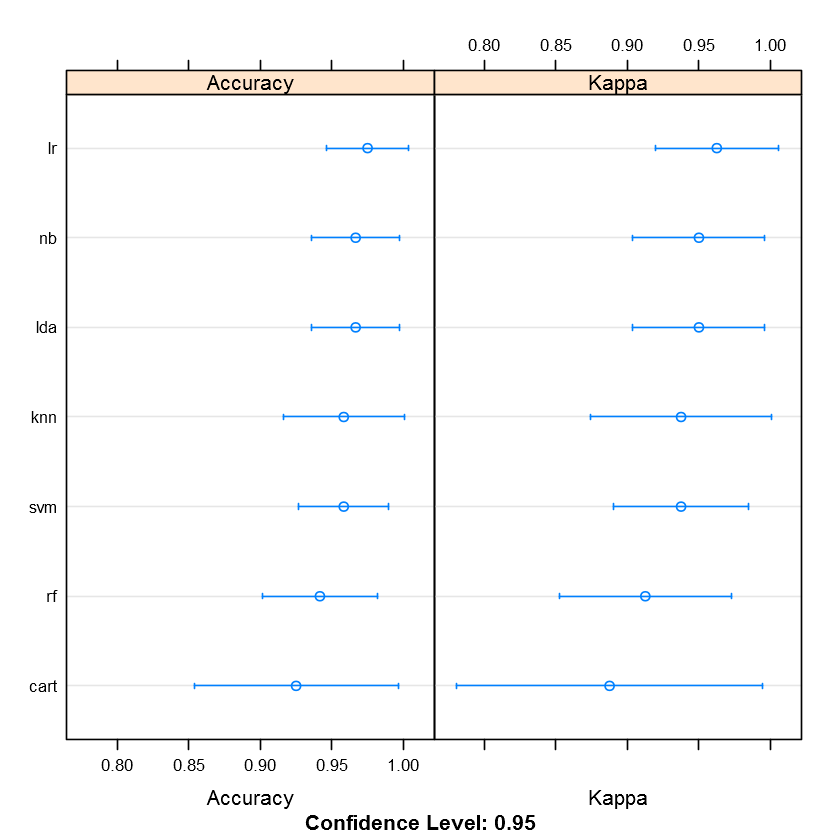

In [30]:
# compare accuracy of models
dotplot(results)
 

To continue developing our study, we will select LR (Logistic regression) model as the best one.

In [31]:
# Summarize Best Model chosen lr
print(fit.lr)
 

Penalized Multinomial Regression 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa 
  0e+00  0.9583333  0.9375
  1e-04  0.9666667  0.9500
  1e-01  0.9750000  0.9625

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was decay = 0.1.


### 7.4 Make predictions

The LR algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.


In [32]:
# estimate skill of lr on the validation dataset
predictions <- predict(fit.lr, validation)
confusionMatrix(predictions, validation$Species)
 

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 0.9500
Pos Pred Value                   1.0000                 0.9091
Neg Pred Value                   1.0000                 1

In [33]:
# print validation dataset and predictions by row
(val<-as.data.frame(c(validation,as.data.frame(predictions))))
 

SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predictions
5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
5.1,3.8,1.9,0.4,Iris-setosa,Iris-setosa


Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in Wikipedia  [ https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers]. Anyway, I am working my way to developing a short project where I will cover this topic in a short precise and practical way.

In [34]:
# make prediction on a new test data
# new test data 
new_data <- data.frame(SepalLength=c(5.1, 6.7, 6.2), SepalWidth=c(3.5,3.0,3.0), PetalLength=c(1.4,5.2,5.1), PetalWidth=c(0.2,2.3,2.3))

# make prediction
prediction <- predict(fit.lr, new_data)
# show the result
for (i in 1:length(new_data[,1])){
  print(paste("Data",i,":","Iris FLOWER with SepalLength=", new_data[i,1],"SepalWidth=", new_data[i,2], "PetalLength=", new_data[i,3],"PetalWidth=",new_data[i,4], "will be -->", prediction[i]))
}

[1] "Data 1 : Iris FLOWER with SepalLength= 5.1 SepalWidth= 3.5 PetalLength= 1.4 PetalWidth= 0.2 will be --> Iris-setosa"
[1] "Data 2 : Iris FLOWER with SepalLength= 6.7 SepalWidth= 3 PetalLength= 5.2 PetalWidth= 2.3 will be --> Iris-virginica"
[1] "Data 3 : Iris FLOWER with SepalLength= 6.2 SepalWidth= 3 PetalLength= 5.1 PetalWidth= 2.3 will be --> Iris-virginica"


## VIII Conclusion
 
This project provides an introduction to get started with predictive analysis using R and caret. The idea here is to provide a basic understanding of getting started with a machine learning problem and how to use data visualization to comprehend a problem better.

Hitting at the right machine learning algorithm is the ideal approach to achieve higher accuracy. But, it is easier said than done.

Improving the models can be done by tuning their parameters. Every Machine Learning model comes with a variety of parameters to tune and these parameters can be vitally important to the performance of our classifier.

Enhancing a model performance can be challenging at times. You try all the strategies and algorithms that you’ve learnt. Yet, you fail at improving the accuracy of your model. You feel helpless and stuck.

After having a post graduate degree in STAT, I’ve always preferred to first learn practically than digging theories. Learn the basic, applied data, get experience and then try to learn more theory if you still needed. I advise improving your learning about these methods by practicing and practicing and practicing trying to work with data as much as you can.

Finally, all models incorporated here are presented and compared to their default version provided by the caret library. This project can be used as a template that you can use on your dataset as a first approximation of your final selected model.


<hr>
<center>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | August 2017<br>
Url: [http://www.arqmain.net] &nbsp;&nbsp;&nbsp;  |&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]</center>